# MOVIE RECOMMENDATION SYSTEM

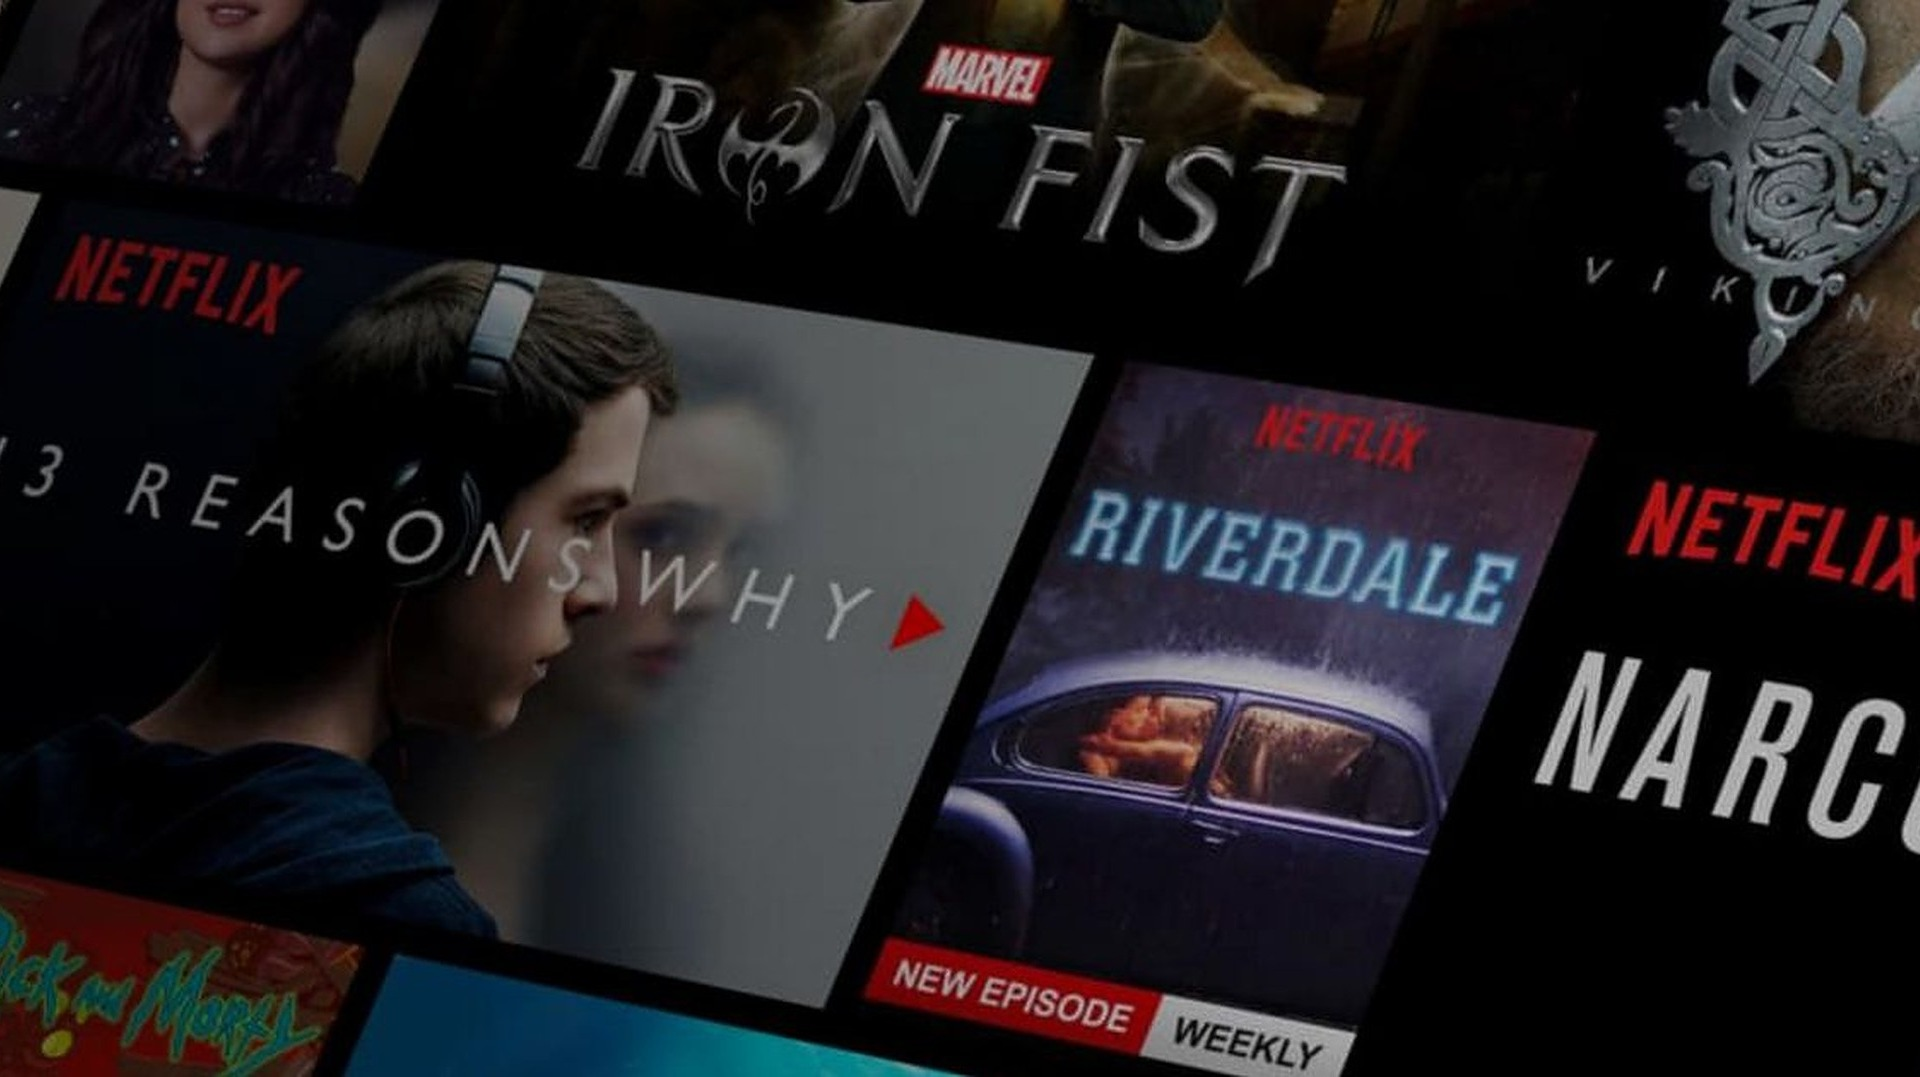

In [19]:
from IPython.display import Image

# Use a raw string by adding an 'r' prefix
Image(filename=r'C:\Users\mansh\Downloads\KNN\pic.jpg.jpg')


In [29]:
import pandas as pd

df=pd.read_csv(r'C:\Users\mansh\Downloads\KNN/ratings.csv')


In [32]:
df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,964982224,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,964983815,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,964982931,Father of the Bride Part II (1995),Comedy
5,1,70,3.0,964982400,Heat (1995),Action|Crime|Thriller
6,1,101,5.0,964980868,Sabrina (1995),Comedy|Romance
7,1,110,4.0,964982176,Tom and Huck (1995),Adventure|Children
8,1,151,5.0,964984041,Sudden Death (1995),Action
9,1,157,5.0,964984100,GoldenEye (1995),Action|Adventure|Thriller


In [33]:
# Pivot the dataframe to create a user-movie matrix
movie_users = df.pivot_table(index='movieId', columns='userId', values='rating', fill_value=0)

In [65]:
# Separate features (X) and target values (y)
X = movie_users.values
y = movie_users.index.values


In [35]:
print(movie_users)

userId   1    2    3  4  5  6
movieId                      
1        4  0.0  0.0  0  4  0
2        0  0.0  0.0  0  0  4
3        4  0.0  0.0  0  0  5
4        0  0.0  0.0  0  0  3
5        0  0.0  0.0  0  0  5
...     ..  ...  ... .. .. ..
112552   0  4.0  0.0  0  0  0
114060   0  2.0  0.0  0  0  0
115713   0  3.5  0.0  0  0  0
122882   0  5.0  0.0  0  0  0
131724   0  5.0  0.0  0  0  0

[569 rows x 6 columns]


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Create and train a K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=20, metric='cosine')
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(metric='cosine', n_neighbors=20)

In [40]:
def recommender(movie_name, data, model, n):
    idx = process.extractOne(movie_name, movie['title'])[2]
    print('Movie selected: ', movie['title'][idx], 'index: ', idx)
    print("Searching for recommendations.....")
    distances, indices = model.kneighbors(data[idx].reshape(1, -1), n_neighbors=n)
    recommendations = [movie['title'][i] for i in indices.flatten() if i != idx]

    print("Recommendations:")
    for i, movie_title in enumerate(recommendations, 1):
        print(f"{i}. {movie_title}")


In [41]:

# Call the recommender function with the test data
recommender('Toy Story', X_test, knn_regressor, 5)

# Evaluate on the test set
y_pred = knn_regressor.predict(X_test)

Movie selected:  Toy Story (1995) index:  0
Searching for recommendations.....
Recommendations:
1. Free Willy (1993)
2. Interview with the Vampire: The Vampire Chronicles (1994)
3. Heavyweights (Heavy Weights) (1995)
4. Boys of St. Vincent, The (1992)
5. Taxi Driver (1976)


In [46]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Define the features and target variable
X_train = train_data[['userId', 'movieId']]
y_train = train_data['rating']
X_test = test_data[['userId', 'movieId']]
y_test = test_data['rating']

# Create and train the k-NN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_regressor.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')



Root Mean Squared Error (RMSE): 1.4127111546656026


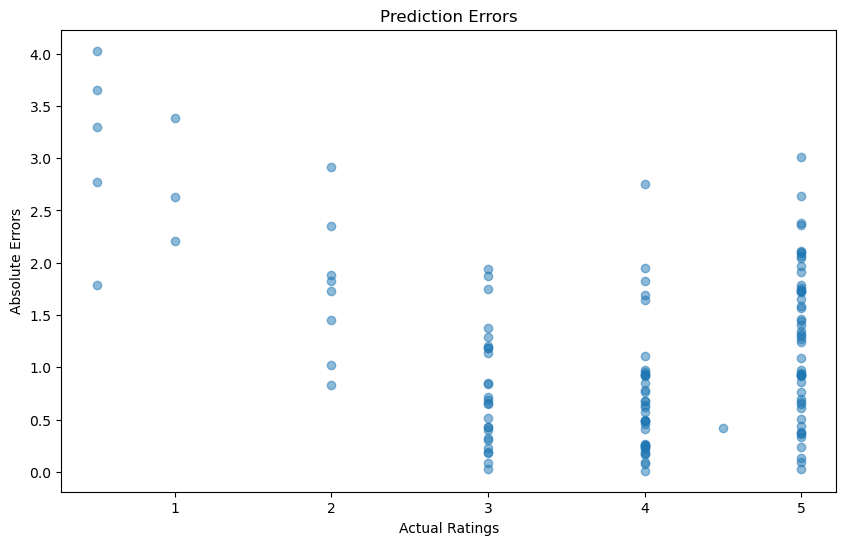

In [52]:
import matplotlib.pyplot as plt
import numpy as np


# Plot the square mean error for each prediction
errors = np.abs(predictions - y_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, alpha=0.5)
plt.title('Prediction Errors')
plt.xlabel('Actual Ratings')
plt.ylabel('Absolute Errors')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer

# Define a scorer for cross-validation (using negative mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 5-fold cross-validation
cv_scores_5_fold = cross_val_score(knn_regressor, X, y, cv=5, scoring=scorer)
print("Mean RMSE (5-fold cross-validation):", np.mean(np.sqrt(-cv_scores_5_fold)))

Mean RMSE (5-fold cross-validation): 11546.585438806345


In [56]:
# 10-fold cross-validation
cv_scores_10_fold = cross_val_score(knn_regressor, X, y, cv=10, scoring=scorer)
print("Mean RMSE (10-fold cross-validation):", np.mean(np.sqrt(-cv_scores_10_fold)))

Mean RMSE (10-fold cross-validation): 8236.573558853397


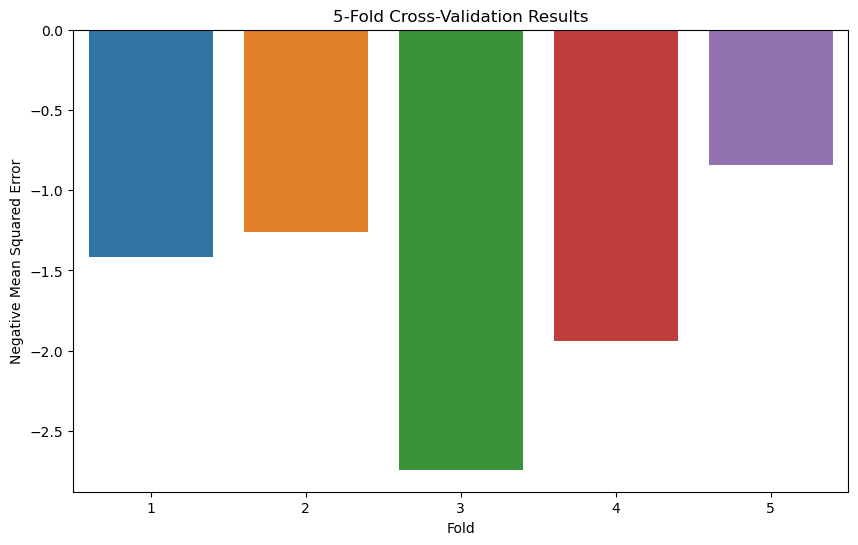

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the results into a DataFrame
cv_results = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Score': cv_scores_5_fold,
    'Type': '5-Fold'
})

# Plot the results using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Fold', y='Score', data=cv_results)
plt.title('5-Fold Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Negative Mean Squared Error')
plt.show()

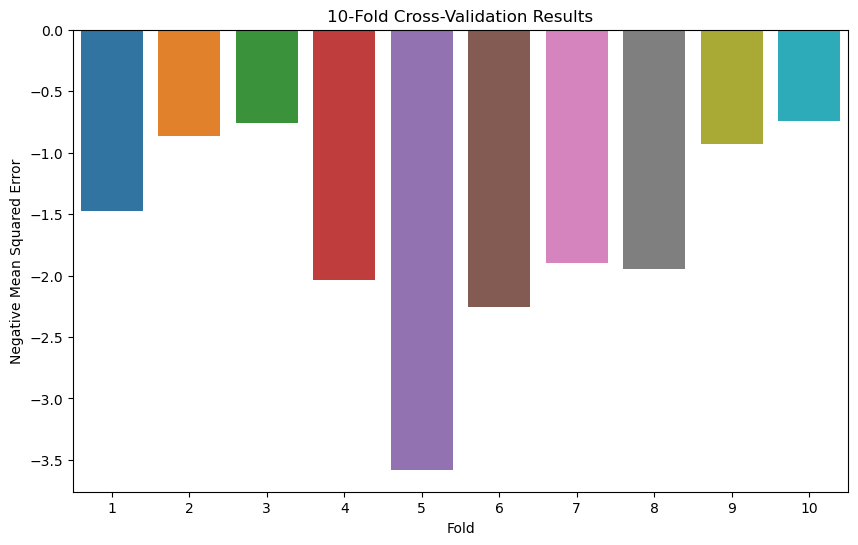

In [64]:
# Combine the results into a DataFrame
cv_results = pd.DataFrame({
    'Fold': np.arange(1, 11),
    'Score': cv_scores_10_fold,
    'Type': '10-Fold'
})

# Plot the results using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Fold', y='Score', data=cv_results)
plt.title('10-Fold Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Negative Mean Squared Error')
plt.show()